In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

### Description:

#### Context:

This study analyzes life expectancy data from 2000-2015 from <a href="https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who">this dataset</a>, focusing on factors such as immunization, mortality, economic, and social aspects. It uses a regression model based on mixed effects model and multiple linear regression, aiming to highlight key contributors to life expectancy. This will assist countries in identifying areas of focus to increase their populations' life expectancy.

#### Content:

Data for 193 countries is sourced from the Global Health Observatory (GHO) data repository (World Health Organization) and the United Nations. The dataset includes critical health-related factors observed over the past 15 years. After merging individual files and handling missing data (mostly population, Hepatitis B, and GDP data), the final dataset comprises 22 columns and 2938 rows, indicating 20 predicting variables. These predictors fall into categories: immunization-related, mortality, economical, and social factors.

#### Acknowledgements:

Data collection was facilitated by Deeksha Russell and Duan Wang from the WHO and United Nations websites.

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.shape

(2938, 22)

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy_                 2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles_                         2938 non-null   int64  
 10  _BMI_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   int64  
 12  Polio               

### Q1: Our data contains missing values. Determine the percentage of missing data in each column. Is the missingness associated with any other variable? For example, could the data be more likely missing in specific years?

In [7]:
missing_data = df.isnull().mean() * 100
print("Percentage of missing data in each column:")
print(missing_data)

Percentage of missing data in each column:
Country                             0.000000
Year                                0.000000
Status                              0.000000
Life_expectancy_                    0.340368
Adult_Mortality                     0.340368
infant_deaths                       0.000000
Alcohol                             6.603131
percentage_expenditure              0.000000
Hepatitis_B                        18.822328
Measles_                            0.000000
_BMI_                               1.157250
under-five_deaths_                  0.000000
Polio                               0.646698
Total_expenditure                   7.692308
Diphtheria_                         0.646698
_HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
_thinness__1-19_years               1.157250
_thinness_5-9_years                 1.157250
Income_composition_of_resources     5.684139
Schooling   

In [8]:
#H0 - there's no significant association between the missingness in the column and 'year' (p>0.05)
#H1 - there's significant association between the missingness in the column and 'year' (p<=0.05)

columns = df.columns.tolist()
columns.remove('Year')

for column in columns:
    df['is_missing'] = df[column].isnull()
    contingency_table = pd.crosstab(df['is_missing'], df['Year'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\nChi-square test between missingness of {column} and Year:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")


Chi-square test between missingness of Country and Year:
Chi2 value: 0.0
P-value: 1.0

Chi-square test between missingness of Status and Year:
Chi2 value: 0.0
P-value: 1.0

Chi-square test between missingness of Life_expectancy_ and Year:
Chi2 value: 142.71373056994818
P-value: 6.700969304769984e-23

Chi-square test between missingness of Adult_Mortality and Year:
Chi2 value: 142.71373056994818
P-value: 6.700969304769984e-23

Chi-square test between missingness of infant_deaths and Year:
Chi2 value: 0.0
P-value: 1.0

Chi-square test between missingness of Alcohol and Year:
Chi2 value: 2570.0865379816364
P-value: 0.0

Chi-square test between missingness of percentage_expenditure and Year:
Chi2 value: 0.0
P-value: 1.0

Chi-square test between missingness of Hepatitis_B and Year:
Chi2 value: 442.4908142143988
P-value: 7.884609666510395e-85

Chi-square test between missingness of Measles_ and Year:
Chi2 value: 0.0
P-value: 1.0

Chi-square test between missingness of _BMI_ and Year:
Chi2 v

From the tests, we observe that:

- For most features, including Country, Year, Status, infant_deaths, percentage_expenditure, Measles_, BMI, under-five_deaths_, _HIV/AIDS, GDP, Population, _thinness__1-19_years, _thinness_5-9_years, Income_composition_of_resources, and Schooling, the p-value is nearly 1, suggesting the missingness in these features is not related to the 'Year'. Thus, these variables are Missing Completely At Random.

- In contrast, for Life_expectancy_, Adult_Mortality, Alcohol, Hepatitis_B, and Total_expenditure, the p-values are significantly less than 0.05, meaning the null hypothesis (H0: the data are MCAR) can be rejected. This suggests a significant association between the 'Year' and the missingness in these features, implying that the missingness in these variables is not random and might be dependent on 'Year'.

- For Polio and Diphtheria_, the p-value is above 0.05, suggesting that the missingness of these variables could be random with respect to 'Year'.

It may be necessary to employ more complex imputation strategies, like multiple imputation or predictive modeling, that consider the dependence on 'Year' but we will use mean, mode or median to fill that NaN values. Let's check their distributions.

In [9]:
nan_features = ["Alcohol", "Hepatitis_B", "_BMI_", "Polio", "Total_expenditure", "Diphtheria_",
                "GDP", "Population", "_thinness__1-19_years", "_thinness_5-9_years",
                "Income_composition_of_resources", "Schooling"]

array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Hepatitis_B'}>,
        <AxesSubplot:title={'center':'_BMI_'}>],
       [<AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total_expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria_'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'_thinness__1-19_years'}>],
       [<AxesSubplot:title={'center':'_thinness_5-9_years'}>,
        <AxesSubplot:title={'center':'Income_composition_of_resources'}>,
        <AxesSubplot:title={'center':'Schooling'}>]], dtype=object)

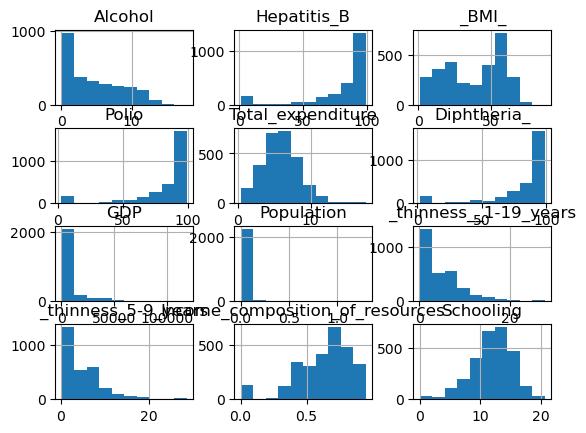

In [10]:
df[nan_features].hist()

Only Total_expenditure and Schooling look like normal distributed features - we will use mean for NaN replacing of their variables. For all other features we will use median.

In [11]:
# mean replacing
df["Total_expenditure"].fillna(df["Total_expenditure"].mean(), inplace=True)
df["Schooling"].fillna(df["Schooling"].mean(), inplace=True)

#median replacing
nan_features = df.columns[df.isnull().any()].tolist()
for i in nan_features:
    if i not in ["Total_expenditure", "Schooling"]:
        df[i].fillna(df[i].median(), inplace=True)

### Q2: Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy

In [12]:
life_expectancy_df_corr = df.corr()["Life_expectancy_"][:-1]
golden_features_list = life_expectancy_df_corr[abs(life_expectancy_df_corr) > 0.5].sort_values(ascending=False).iloc[1:]
print("There are {} high correlated features with Life expectancy:\n{}".format(len(golden_features_list), golden_features_list))

There are 5 high correlated features with Life expectancy:
Schooling                          0.714358
Income_composition_of_resources    0.688662
_BMI_                              0.556901
_HIV/AIDS                         -0.556703
Adult_Mortality                   -0.696390
Name: Life_expectancy_, dtype: float64


### Q3:  What is the average (mean) life expectancy across all countries in the dataset? How does it vary (standard deviation)? What are the minimum and maximum life expectancy values? (calculate for each year)

In [13]:
df[["Life_expectancy_", "Year"]].groupby(["Year"]).describe()

Life_expectancy_                                                      
                count       mean        std   min    25%   50%    75%   max
Year                                                                       
2000            183.0  66.750273  10.295528  39.0  58.65  71.0  74.45  81.1
2001            183.0  67.128962  10.189630  41.0  59.00  71.2  74.90  82.0
2002            183.0  67.351366  10.062469  44.0  59.35  71.4  74.80  84.0
2003            183.0  67.433333  10.127681  41.5  59.75  71.1  74.70  87.0
2004            183.0  67.646448  10.126409  42.3  60.70  71.2  74.30  89.0
2005            183.0  68.209290   9.799516  43.3  63.50  71.6  74.95  88.0
2006            183.0  68.667760   9.815171  44.3  62.25  72.1  75.00  88.0
2007            183.0  69.036066   9.618584  45.3  62.05  72.4  75.15  89.0
2008            183.0  69.427869   9.202612  46.2  62.70  72.4  75.35  89.0
2009            183.0  69.938251   8.989124  47.1  64.45  72.6  76.00  89.0
2010            183.0  70.048634   9.302959  36.3  63.45  72.8  75.80  89.0
2011            183.0  70.654098   8.925040  48.9  63.90  73.3  76.10  88.0
2012            183.0  70.916940   8.562151  49.7  64.50  73.2  76.50  88.0
2013            193.0  71.280829   8.193983  49.9  66.00  72.8  76.20  87.0
2014            183.0  71.536612   8.560831  48.1  65.60  73.6  76.85  89.0
2015            183.0  71.616940   8.123706  51.0  65.75  73.9  76.95  88.0

From the results, we observe that:
- There is a general upward trend in life expectancy over the period from 2000 to 2015. The mean life expectancy increased from 66.75 years in 2000 to 71.61 years in 2015.

- The standard deviation, which measures the dispersion of data from its mean, has decreased over time. This indicates that life expectancy has become more uniform across different regions over these years.

- The minimum life expectancy has also shown a progressive increase from 39.0 in 2000 to 51.0 in 2015, suggesting improvements in countries with the lowest life expectancies.

- The maximum life expectancy has likewise increased over this period, from 81.1 in 2000 to 88.0 in 2015, indicating advances in the countries with the highest life expectancies.

- The interquartile ranges (from 25% to 75%), representing the middle 50% of the data, have also shown a general increase. This means that half of all countries have seen consistent growth in life expectancy over this period.

Overall, the table indicates global progress in increasing life expectancy between 2000 and 2015. The trend suggests improvements in healthcare, living conditions, and access to basic services over this period. However, disparities still exist, as shown by the continued variation in life expectancy across different regions.

### Q4: Can we predict life expectancy based on variables like Adult Mortality, Alcohol consumption, percentage expenditure, and schooling? How much of the variation in life expectancy can be explained by these variables?

In [14]:
am = list(df["Adult_Mortality"])
ac = list(df["Alcohol"])
te = list(df["Total_expenditure"])
s = list(df["Schooling"])

le = list(df["Life_expectancy_"])

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.539
Method:                 Least Squares   F-statistic:                              3438.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):                        0.00
Time:                        10:48:43   Log-Likelihood:                         -15508.
No. Observations:                2938   AIC:                                  3.102e+04
Df Residuals:                    2937   BIC:                                  3.102e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

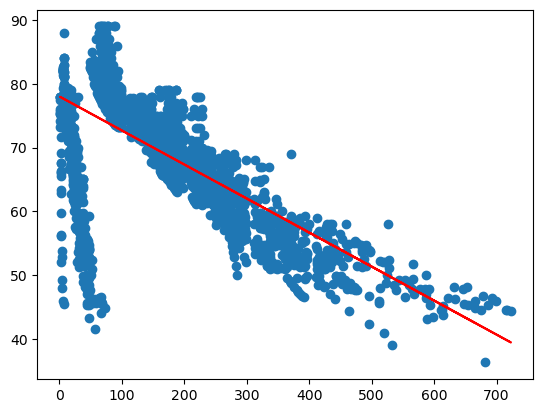

In [15]:
X_am = sm.add_constant(am)
model_am = sm.OLS(le, am)
results_am = model_am.fit()

print(results_am.summary())

slope, intercept, r, p, std_err = stats.linregress(am, le)

lrmodel_am = [slope * x + intercept for x in am]

plt.scatter(am, le)
plt.plot(am, lrmodel_am, color="red")
plt.show()

From the results, we observe that:
- Coefficient of Adult_Mortality: The coefficient of Adult_Mortality is positive (0.2489), indicating that there is a positive relationship between Adult_Mortality and the dependent variable Life_expectancy_. For each unit increase in Adult_Mortality, the expected value of Life_expectancy_ increases by 0.2489 units, holding all else constant.

- Significance of Adult_Mortality: The p-value for Adult_Mortality is 0.000, which is less than the commonly used significance level of 0.05. This means that the variable Adult_Mortality is statistically significant in explaining the variation in Life_expectancy_. The 95% confidence interval for the coefficient of Adult_Mortality (0.241 to 0.257) does not contain zero, further confirming its significance.

- Model Fit: The R-squared value is 0.539, which means that approximately 53.9% of the variation in the dependent variable Life_expectancy_ can be explained by the independent variable Adult_Mortality. The adjusted R-squared, which takes into account the number of predictors in the model, is also 0.539, suggesting that the model does not suffer from the inclusion of irrelevant predictors.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              4710.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):                        0.00
Time:                        10:48:44   Log-Likelihood:                         -15240.
No. Observations:                2938   AIC:                                  3.048e+04
Df Residuals:                    2937   BIC:                                  3.049e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

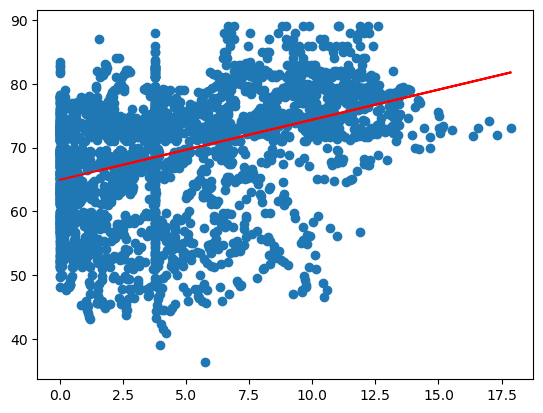

In [16]:
X_ac = sm.add_constant(ac)
model_ac = sm.OLS(le, ac)
results_ac = model_ac.fit()

print(results_ac.summary())

slope, intercept, r, p, std_err = stats.linregress(ac, le)

lrmodel_ac = [slope * x + intercept for x in ac]

plt.scatter(ac, le)
plt.plot(ac, lrmodel_ac, color="red")
plt.show() 

From the results, we observe that:
- Coefficient of Alcohol: The coefficient of Alcohol is positive (9.1344), indicating that there is a positive relationship between Alcohol and the dependent variable Life_expectancy_. For each unit increase in Alcohol, the expected value of Life_expectancy_ increases by approximately 9.1344 units, holding all else constant.

- Significance of Alcohol: The p-value for Alcohol is 0.000, which is less than the commonly used significance level of 0.05. This means that the variable Alcohol is statistically significant in explaining the variation in Life_expectancy_. The 95% confidence interval for the coefficient of Alcohol (8.873 to 9.395) does not contain zero, which further confirms its significance.

- Model Fit: The R-squared value is 0.616, which means that approximately 61.6% of the variation in the dependent variable Life_expectancy_ can be explained by the independent variable Alcohol. The adjusted R-squared, which takes into account the number of predictors in the model, is also 0.616, suggesting that the model does not suffer from the inclusion of irrelevant predictors.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                          1.856e+04
Date:                Wed, 14 Jun 2023   Prob (F-statistic):                        0.00
Time:                        10:48:44   Log-Likelihood:                         -13722.
No. Observations:                2938   AIC:                                  2.745e+04
Df Residuals:                    2937   BIC:                                  2.745e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

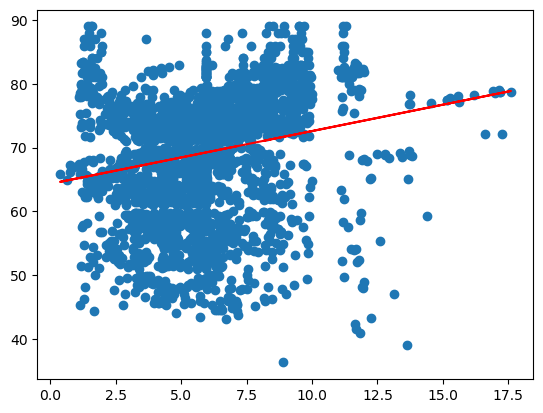

In [17]:
X_te = sm.add_constant(te)
model_te = sm.OLS(le, te)
results_te = model_te.fit()

print(results_te.summary())

slope, intercept, r, p, std_err = stats.linregress(te, le)

lrmodel_te = [slope * x + intercept for x in te]

plt.scatter(te, le)
plt.plot(te, lrmodel_te, color="red")
plt.show() 

From the results, we observe that:
- Coefficient of Total_expenditure: The coefficient of Total_expenditure is positive (10.1385), indicating that there is a positive relationship between Total_expenditure and the dependent variable Life_expectancy_. For each unit increase in Total_expenditure, the expected value of Life_expectancy_ increases by approximately 10.1385 units, holding all else constant.

- Significance of Total_expenditure: The p-value for Total_expenditure is 0.000, which is less than the commonly used significance level of 0.05. This means that the variable Total_expenditure is statistically significant in explaining the variation in Life_expectancy_. The 95% confidence interval for the coefficient of Total_expenditure (9.993 to 10.284) does not contain zero, which further confirms its significance.

- Model Fit: The R-squared value is 0.863, which means that approximately 86.3% of the variation in the dependent variable Life_expectancy_ can be explained by the independent variable Total_expenditure. The adjusted R-squared, which takes into account the number of predictors in the model, is also 0.863, suggesting that the model does not suffer from the inclusion of irrelevant predictors.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          7.699e+04
Date:                Wed, 14 Jun 2023   Prob (F-statistic):                        0.00
Time:                        10:48:44   Log-Likelihood:                         -11793.
No. Observations:                2938   AIC:                                  2.359e+04
Df Residuals:                    2937   BIC:                                  2.359e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

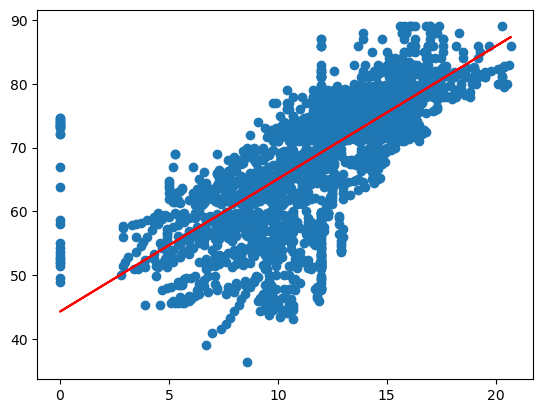

In [18]:
X_s = sm.add_constant(s)
model_s = sm.OLS(le, s)
results_s = model_s.fit()

print(results_s.summary())

slope, intercept, r, p, std_err = stats.linregress(s, le)

lrmodel_s = [slope * x + intercept for x in s]

plt.scatter(s, le)
plt.plot(s, lrmodel_s, color="red")
plt.show() 

From the results, we observe that:
- Coefficient of Schooling: The coefficient of Schooling is positive (5.5184), indicating that there is a positive relationship between Schooling and the dependent variable Life_expectancy_. For each unit increase in Schooling, the expected value of Life_expectancy_ increases by approximately 5.5184 units, holding all else constant.

- Significance of Schooling: The p-value for Schooling is 0.000, which is less than the commonly used significance level of 0.05. This means that the variable Schooling is statistically significant in explaining the variation in Life_expectancy_. The 95% confidence interval for the coefficient of Schooling (5.479 to 5.557) does not contain zero, which further confirms its significance.

- Model Fit: The R-squared value is 0.963, which means that approximately 96.3% of the variation in the dependent variable Life_expectancy_ can be explained by the independent variable Schooling. The adjusted R-squared, which takes into account the number of predictors in the model, is also 0.963, suggesting that the model does not suffer from the inclusion of irrelevant predictors.

### Q5: Is there a significant difference in the mean life expectancy between developed and developing countries (as indicated by the 'Status' column)?

We could use a t-test for this if the distributions are approximately normal, or a Mann-Whitney U test if they are not.

<AxesSubplot:>

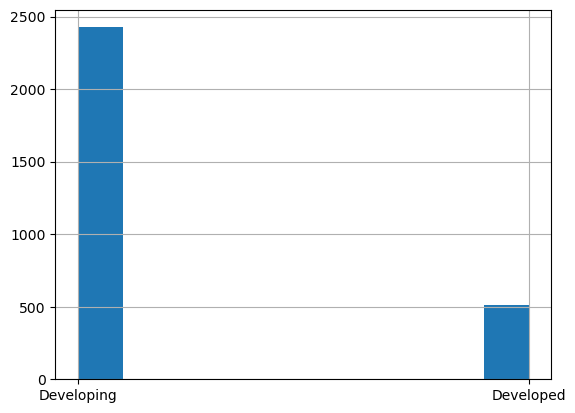

In [19]:
df["Status"].hist()

We can see the high difference between the quantity of developing and developed countries.

<AxesSubplot:>

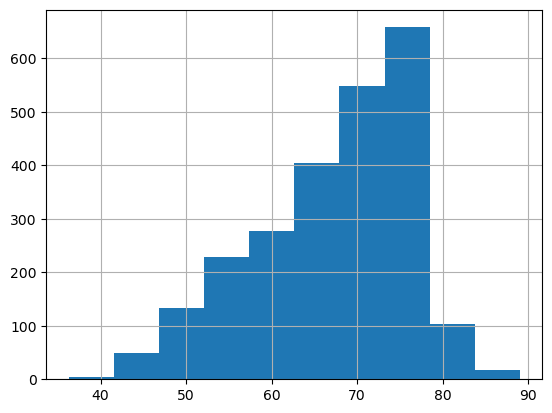

In [20]:
df[df["Status"] == "Developing"]["Life_expectancy_"].hist()

<AxesSubplot:>

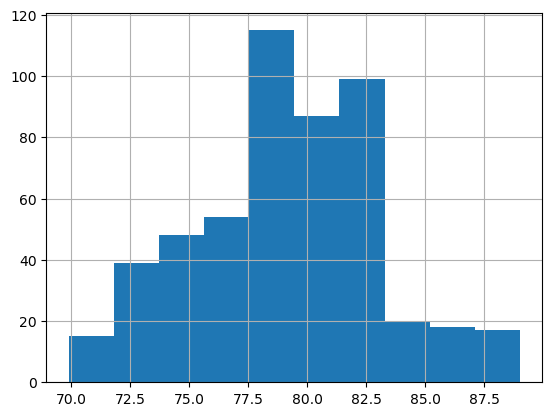

In [21]:
df[df["Status"] == "Developed"]["Life_expectancy_"].hist()

We can check the normality of distributions by Shapiro-Wilk test.

In [22]:
#H0 - the distribution is normal (p>0.05)
#H1 - the distribution isn't normal (p<=0.05)

shapiro_test = stats.shapiro(df[df["Status"] == "Developing"]["Life_expectancy_"])
shapiro_test

ShapiroResult(statistic=0.9493448138237, pvalue=3.695484488422436e-28)

In [23]:
#H0 - the distribution is normal (p>0.05)
#H1 - the distribution isn't normal (p<=0.05)

shapiro_test = stats.shapiro(df[df["Status"] == "Developed"]["Life_expectancy_"])
shapiro_test

ShapiroResult(statistic=0.984403133392334, pvalue=2.6695464839576744e-05)

We can reject H0 => Both distributions aren't normal. We will use Mann-Whitney U test.

In [24]:
developing = df[df["Status"] == "Developing"]["Life_expectancy_"]
developed = df[df["Status"] == "Developed"]["Life_expectancy_"]

/home/pcubu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pcubu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/pcubu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/pcubu/anaco

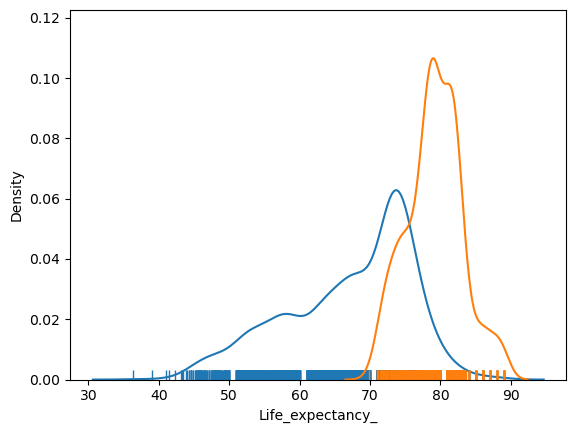

In [25]:
sns.distplot(developing, hist=False, rug=True)
sns.distplot(developed, hist=False, rug=True)

plt.show()

In [26]:
#H0 -  There is no significant difference in the mean life expectancy between developed and developing countries. (p>0.05)
#H1 - There is a significant difference in the mean life expectancy between developed and developing countries. (p<=0.05)

u_stat, u_p_val = stats.mannwhitneyu(developed, developing)
print(f'Mann-Whitney U test p-value: {u_p_val}')

Mann-Whitney U test p-value: 6.6411125328204414e-192


We can reject H0 => There is a significant difference in the mean life expectancy between developed and developing countries.